<a href="https://colab.research.google.com/github/aasb2/Classificador-de-Bayes-Ingenuo/blob/main/PROJETO/plotestatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
url = 'https://raw.githubusercontent.com/aasb2/Classificador-de-Bayes-Ingenuo/main/DATASET/bank/bank-full.csv'
df = pd.read_csv(url,delimiter = ';')
#df.describe(include = 'all')
print(df.shape)

(45211, 17)


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
print(df['job'])

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object


In [6]:
le = preprocessing.LabelEncoder()

In [7]:
age = np.asarray(le.fit_transform(df['age']))
job = np.asarray(le.fit_transform(df['job']))
marital = np.asarray(le.fit_transform(df['marital']))
education = np.asarray(le.fit_transform(df['education']))
default = np.asarray(le.fit_transform(df['default']))
balance = np.asarray(le.fit_transform(df['balance']))
housing = np.asarray(le.fit_transform(df['housing']))
loan = np.asarray(le.fit_transform(df['loan']))
contact = np.asarray(le.fit_transform(df['contact']))
day = np.asarray(le.fit_transform(df['day']))
month = np.asarray(le.fit_transform(df['month']))
duration = np.asarray(le.fit_transform(df['duration']))
campaign = np.asarray(le.fit_transform(df['campaign']))
pdays = np.asarray(le.fit_transform(df['pdays']))
previous = np.asarray(le.fit_transform(df['previous']))
poutcome = np.asarray(le.fit_transform(df['poutcome']))
y = np.asarray(le.fit_transform(df['y']))
job

array([4, 9, 2, ..., 5, 1, 2])

In [8]:
x = np.asarray([age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome])
x= x.transpose()
x

array([[ 40,   4,   1, ...,   0,   0,   3],
       [ 26,   9,   2, ...,   0,   0,   3],
       [ 15,   2,   1, ...,   0,   0,   3],
       ...,
       [ 54,   5,   1, ..., 181,   3,   2],
       [ 39,   1,   1, ...,   0,   0,   3],
       [ 19,   2,   1, ..., 185,  11,   1]])

In [9]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=100)
x_test

array([[ 27,   2,   1, ..., 195,   4,   0],
       [ 31,   7,   1, ...,   0,   0,   3],
       [ 27,   1,   1, ...,   0,   0,   3],
       ...,
       [ 11,   1,   2, ...,   0,   0,   3],
       [ 28,   1,   1, ...,   0,   0,   3],
       [ 23,   1,   1, ...,   0,   0,   3]])

In [28]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
y_pred

# summarize probability distributions of the dataset
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
    mu = mean(data)
    sigma = std(data)
    #variancia = norm.Mean(data)
    print(mu, sigma)
    # fit distribution
    dist = norm(mu, sigma)
    #print(dist)
    return dist


####**IDADES**

In [29]:
maxage = max(age) + 1
print(maxage)
x1 = list(range(0,int(maxage)))
y1 = list(range(0,int(maxage)))
for i in y1:
    y1[i] = 0

for i in age:
    y1[i] += 1

print(y1)

77
[12, 35, 50, 79, 129, 202, 302, 527, 805, 909, 1038, 1185, 1757, 1996, 2085, 1972, 1930, 1894, 1806, 1696, 1466, 1487, 1355, 1291, 1242, 1161, 1136, 1216, 1175, 1088, 997, 994, 939, 936, 911, 891, 811, 806, 778, 828, 740, 770, 596, 147, 80, 77, 74, 59, 63, 54, 36, 44, 67, 54, 52, 44, 37, 39, 32, 44, 30, 25, 31, 17, 19, 22, 9, 5, 9, 4, 2, 3, 2, 2, 2, 1, 2]


Accuracy 0.66
22.936055384751498 10.61788648022191
47.63695302482272
12


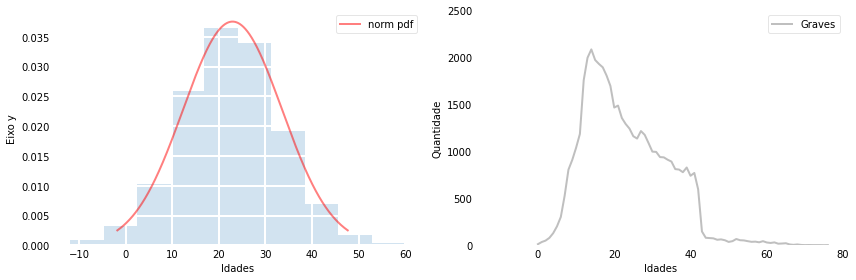

In [37]:
print("Accuracy", accuracy_score(y_test,y_pred))
y_test
distIdades = fit_distribution(age)
print(distIdades.ppf(0.99))

rv = norm()

x = np.linspace(distIdades.ppf(0.01),
                distIdades.ppf(0.99), 1000)
#ax.plot(x, distribuc.pdf(x),
#       'r-', lw=5, alpha=0.6, label='norm pdf')

r = distIdades.rvs(size=1000)

print(y1[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#fig = plt.figure(facecolor='w')
#ax[0] = fig.add_subplot(1,2,1, facecolor='#dddddd', axisbelow=False)

#ax[0].add_subplot(121, facecolor='#dddddd')
#ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptíveis')
ax[0].plot(x, distIdades.pdf(x), 'r', alpha=0.5, lw=2, label='norm pdf')
ax[0].set_xlabel('Idades')
ax[0].set_ylabel('Eixo y')
#ax.set_ylim(0,500)
ax[0].yaxis.set_tick_params(length=0)
ax[0].xaxis.set_tick_params(length=0)
ax[0].grid(b=True, which='major', c='w', lw=2, ls='-')

ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax[0].legend(loc='best', frameon=False)
legend1 = ax[0].legend()
legend1.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax[0].spines[spine].set_visible(False)

#ax[1].plot(t, M, 'r', alpha=0.5, lw=2, label='Mortos')
ax[1].plot(x1, y1, 'gray', alpha=0.5, lw=2, label='Graves')
ax[1].set_xlabel('Idades')
ax[1].set_ylabel('Quantidade')
#ax[1].set_xlim(0,80)
ax[1].set_ylim(0,2500)
ax[1].yaxis.set_tick_params(length=0)
ax[1].xaxis.set_tick_params(length=0)
ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)
#ax[1].legend(loc='best', frameon=False)
#ax[1].grid(b=True, which='major', c='w', lw=2, ls='-')
legend2 = ax[1].legend()
legend2.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax[1].spines[spine].set_visible(False)
fig.tight_layout()

####**Outra Categoria**

In [35]:
distJob = fit_distribution(job)
maxjob = max(job) + 1
print(maxjob)
xjob = list(range(0,int(maxjob)))
yjob = list(range(0,int(maxjob)))
for i in yjob:
    yjob[i] = 0

for i in job:
    yjob[i] += 1

distJob.ppf(0.99)
print(yjob)

4.339762447192055 3.272620727770229
12
[5171, 9732, 1487, 1240, 9458, 2264, 1579, 4154, 938, 7597, 1303, 288]


5171


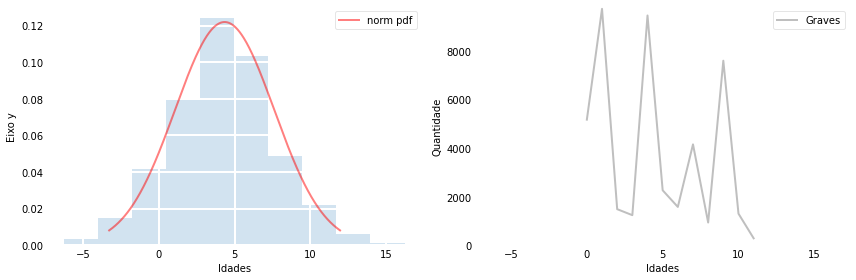

In [36]:
x = np.linspace(distJob.ppf(0.01),
                distJob.ppf(0.99), 1000)
#ax.plot(x, distribuc.pdf(x),
#       'r-', lw=5, alpha=0.6, label='norm pdf')

r = distJob.rvs(size=1000)

print(yjob[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#fig = plt.figure(facecolor='w')
#ax[0] = fig.add_subplot(1,2,1, facecolor='#dddddd', axisbelow=False)

#ax[0].add_subplot(121, facecolor='#dddddd')
#ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptíveis')
ax[0].plot(x, distJob.pdf(x), 'r', alpha=0.5, lw=2, label='norm pdf')
ax[0].set_xlabel('Idades')
ax[0].set_ylabel('Eixo y')
#ax.set_ylim(0,500)
ax[0].yaxis.set_tick_params(length=0)
ax[0].xaxis.set_tick_params(length=0)
ax[0].grid(b=True, which='major', c='w', lw=2, ls='-')

ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax[0].legend(loc='best', frameon=False)
legend1 = ax[0].legend()
legend1.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax[0].spines[spine].set_visible(False)

#ax[1].plot(t, M, 'r', alpha=0.5, lw=2, label='Mortos')
ax[1].plot(xjob, yjob, 'gray', alpha=0.5, lw=2, label='Graves')
ax[1].set_xlabel('Idades')
ax[1].set_ylabel('Quantidade')
#ax[1].set_xlim(0,80)
ax[1].set_ylim(0,max(yjob) + 100)
ax[1].yaxis.set_tick_params(length=0)
ax[1].xaxis.set_tick_params(length=0)
ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)
#ax[1].legend(loc='best', frameon=False)
#ax[1].grid(b=True, which='major', c='w', lw=2, ls='-')
legend2 = ax[1].legend()
legend2.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax[1].spines[spine].set_visible(False)
fig.tight_layout()